In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from scipy.stats import norm

# Measure of central tendencies

## Mean

With a random sample of size `n`:
$$ \bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i $$

## Median

In an ordered dataset such as
> $ x_1 ≤ x_2 ≤ x_3 ≤ ... ≤ x_n $

if `n` is odd:
$$ p = \frac{n + 1}{2} $$
$$ \tilde{x} = x_p $$

If `n` is even:

$$ p = \frac{n}{2} $$
$$ \tilde{x} = \frac{x_p + x_{p+1}}{2} $$

## Mode

If $ X $ is a discrete random variable, the mode is the value $ x $ at which the probability mass function takes its maximum value. 

# Measure of deviation

## Variance

$ \mu $ is the mean:
$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$
Can also be written:
$$ \sigma^2 = \mathbb{E}[x_i^2] - \mu^2 $$

## Standard deviation

$$ \sigma = \sqrt{Variance} = \sqrt{\sigma^2} $$

In [9]:
low_standard_deviation = np.array([-3, -2, -1, 0, 1, 2, 3])
high_standard_deviation = low_standard_deviation * 100
print(f"low_standard_deviation {low_standard_deviation}")
print(f"mean: {low_standard_deviation.mean()}")
print(f"variance: {low_standard_deviation.var()}")
print(f"standard deviation: {low_standard_deviation.std()}")
print()
print(f"high_standard_deviation {high_standard_deviation}")
print(f"mean: {high_standard_deviation.mean()}")
print(f"variance: {high_standard_deviation.var()}")
print(f"standard deviation: {high_standard_deviation.std()}")

low_standard_deviation [-3 -2 -1  0  1  2  3]
mean: 0.0
variance: 4.0
standard deviation: 2.0

high_standard_deviation [-300 -200 -100    0  100  200  300]
mean: 0.0
variance: 40000.0
standard deviation: 200.0


## Sample Variance

When working on a sample, one underestimates the variance of the population therefore we compute the unbiased variance instead:
$$ \sigma^2 = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \mu)^2 $$

# Empirical Relationship between Mean, Median, and Mode

### Normal Distribution

mean: 3.637978807091713e-15, median: 3.552713678800501e-15


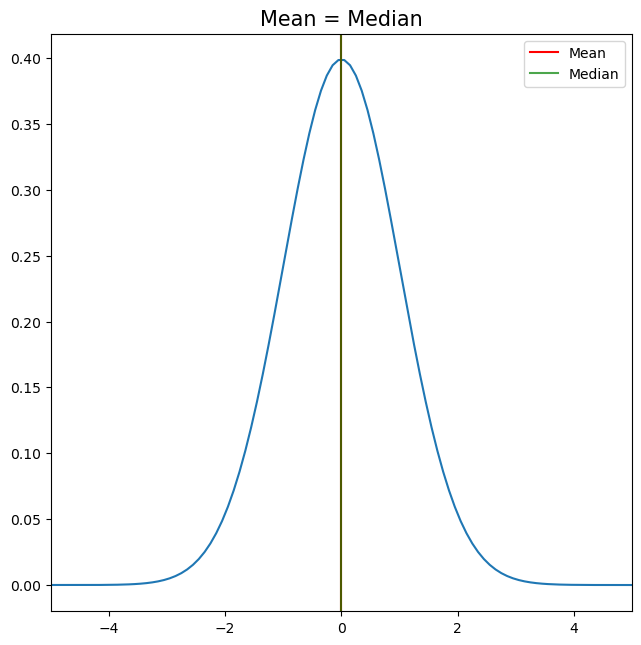

In [10]:
snd = stats.norm(0, 1)
x = np.linspace(-50, 50, 1000)
print(f"mean: {np.mean(x)}, median: {np.median(x)}")
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-5, 5)
plt.title('Mean = Median', fontsize='15')
plt.axvline(x=np.mean(x), color='r', label='Mean')
plt.axvline(x=np.median(x), color='g', label='Median', alpha=0.7)
plt.legend()
plt.show()

### Skewed distribution

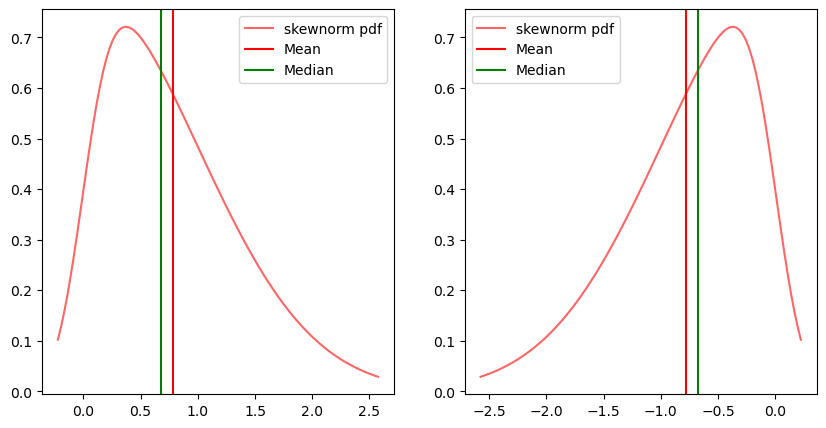

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

a = 5
x = np.linspace(stats.skewnorm.ppf(0.01, a),
                stats.skewnorm.ppf(0.99, a), 100)

b = -5
y =  np.linspace(stats.skewnorm.ppf(0.01, b),
                stats.skewnorm.ppf(0.99, b), 100)

ax1.plot(x, stats.skewnorm.pdf(x, a),
       'r-', alpha=0.6, label='skewnorm pdf')
ax1.axvline(x=stats.skewnorm.mean(a), color='r', label='Mean')
ax1.axvline(x=stats.skewnorm.median(a), color='g', label='Median')
ax1.legend()

ax2.plot(y, stats.skewnorm.pdf(y, b),
       'r-', alpha=0.6, label='skewnorm pdf')
ax2.axvline(x=stats.skewnorm.mean(b), color='r', label='Mean')
ax2.axvline(x=stats.skewnorm.median(b), color='g', label='Median')
ax2.legend()

### Quartile and percentile

[3 5 6 9 6 6 0 1 8 0 8 2 9 0 4 7 2 0 6 0 8 1 6 2 7 1 3 4 1 6]
iqr 5.0 is q3 6.0 - q1 1.0 = 5.0


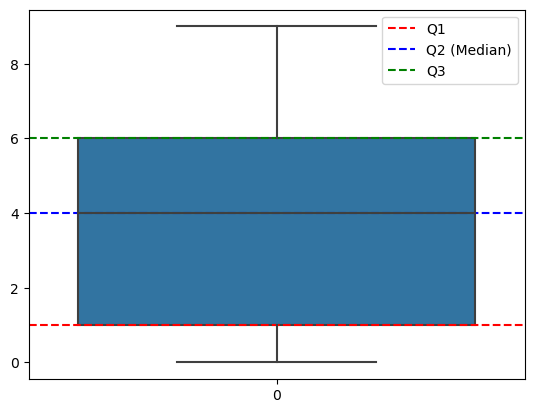

In [12]:
random_array = np.random.randint(0, 10, size=30)
print(random_array)
q1 = np.quantile(random_array, 0.25)
q2 = np.quantile(random_array, 0.50)
q3 = np.quantile(random_array, 0.75)
iqr = stats.iqr(random_array)
print(f"iqr {iqr} is q3 {q3} - q1 {q1} = {q3 - q1}")
plt.axhline(y=q1, color='red', linestyle='--', label='Q1')
plt.axhline(y=q2, color='blue', linestyle='--', label='Q2 (Median)')
plt.axhline(y=q3, color='green', linestyle='--', label='Q3')
sns.boxplot(random_array)
plt.legend()
plt.show()

Outliers are considered to be:
$$ outlier < Q1 - 1.5(IQR) $$ 
and 
$$ outlier > Q3 + 1.5(IQR) $$ 


### Range and mid-range

$$ Range(X) = Max(X) - Min(X) $$
$$ MidRange(X) = \frac{Max(X) + Min(X)}{2} $$


### Mean Absolute Deviation (MAD)

$$ Mean Absolute deviation = {\frac {1}{n}}\sum _{i=1}^{n}|x_{i}-m(X)| $$
$$ Median Absolute Deviation =\operatorname {median} (|X_{i}-{\tilde {X}}|) $$

In [13]:
mean = np.mean(random_array)
mean_abs_deviation = np.mean(np.absolute(random_array - np.mean(random_array)))
median_abs_deviation = stats.median_abs_deviation(random_array)

print(f"mean: {mean}")
print(f"mean standard deviation: {mean_abs_deviation}")
print(f"median standard deviation: {median_abs_deviation}")

mean: 4.033333333333333
mean standard deviation: 2.7022222222222223
median standard deviation: 3.0


### z-score

How many standard deviation away from the mean. Gives you an idea of far from the mean a data point is.
- Positive score is above average, Negative below
- Close to 0 means it's not far from average 

$$ z={x-\mu  \over \sigma } $$

## Normal distribution

Empirical rule:
- +/- $ 1 \sigma $ 68% of the data points
- +/- $ 2 \sigma $ 95% of the data points
- +/- $ 3 \sigma $ 99.7% of the data points

`Python LIBRARY` : [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
- scipy.stats.norm.pdf : Probability Density Function
- scipy.stats.norm.pdf: Percent Point Function
- scipy.stats.norm.cdf: Cumulative Distribution Function

(-5.0, 5.0)

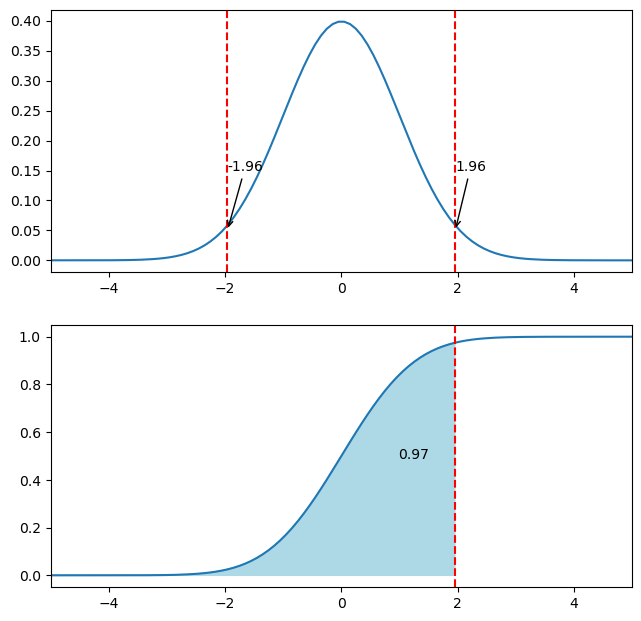

In [33]:
snd = stats.norm(0, 1)
x = np.linspace(-50, 50, 1000)

pdf_values = snd.pdf(x)
cdf_values = snd.cdf(x)

threshold_above = snd.ppf(0.975)  # Two standard deviations above (97.5% percentile)
threshold_below = snd.ppf(0.025)  # Two standard deviations below (2.5% percentile)

probability = snd.cdf(threshold_above)

plt.figure(figsize=(7.5,7.5))

plt.subplot(2, 1, 1)
plt.plot(x, pdf_values)
plt.axvline(x=threshold_above, color='r', linestyle='--')
plt.axvline(x=threshold_below, color='r', linestyle='--')
plt.annotate(f'{threshold_above:.2f}', xy=(threshold_above, 0.05), xytext=(threshold_above, 0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'{threshold_below:.2f}', xy=(threshold_below, 0.05), xytext=(threshold_below, 0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlim(-5, 5)

plt.subplot(2, 1, 2)
plt.plot(x, cdf_values)
plt.fill_between(x, 0, cdf_values, where=(x <= threshold_above), color='lightblue')
plt.axvline(x=threshold_above, color='r', linestyle='--')
# Calculate the midpoint within the filled area
plt.annotate(f'{probability:.2f}', xy=(threshold_above * 0.5, probability / 2))
plt.xlim(-5, 5)

plt.subplot(2, 1, 2)
plt.plot(x, cdf_values)
plt.fill_between(x, 0, cdf_values, where=(x <= threshold_above), color='lightblue')
plt.axvline(x=threshold_above, color='r', linestyle='--')
# Calculate the midpoint within the filled area
plt.annotate(f'{probability:.2f}', xy=(threshold_above * 0.5, probability / 2))
plt.xlim(-5, 5)

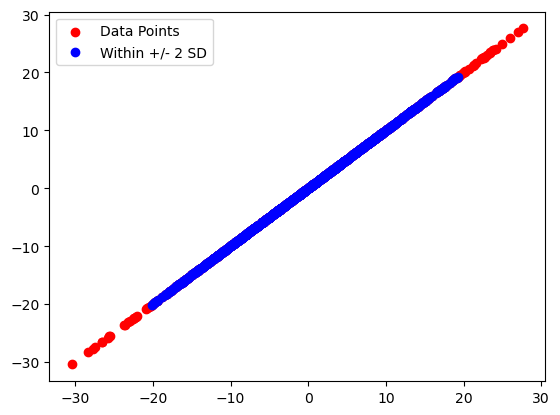

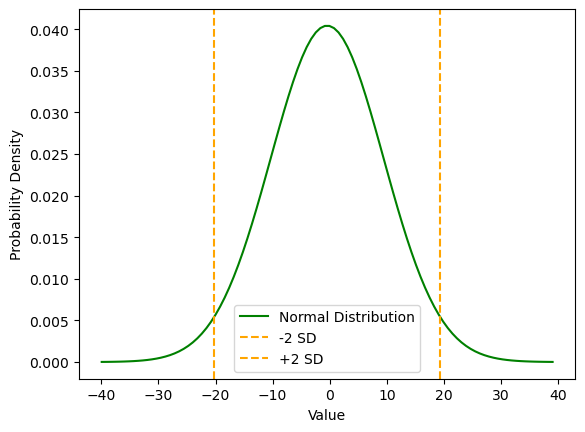

In [ ]:
# Generate random data following a normal distribution
np.random.seed(0)
data = np.random.normal(0, 10, 1000)  # Mean=0, Standard deviation=10

# Calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Define the threshold for highlighting points
threshold = 2 * std

# Separate points within +/- 2 standard deviations
within_threshold = data[(data >= mean - threshold) & (data <= mean + threshold)]
outside_threshold = data[(data < mean - threshold) | (data > mean + threshold)]

plt.figure()
# Create scatter plot
plt.scatter(data, data, color='red', label='Data Points')
plt.scatter(within_threshold, within_threshold, color='blue', label='Within +/- 2 SD')
plt.legend()

plt.figure()
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', label='Normal Distribution')
plt.axvline(mean - threshold, color='orange', linestyle='--', label='-2 SD')
plt.axvline(mean + threshold, color='orange', linestyle='--', label='+2 SD')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Add legend and labels
# Display the plot
plt.show()

### Central Limit theorem

For independent and identically distributed random variables, the sampling distribution of the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

In [ ]:
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )
print(data)

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05 2.06 2.07 2.08 2.09 2.1  2.11
 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21 2.22 2.23 2.24 2.25
 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39
 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52 2.53
 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66 2.67
 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8  2.81
 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93 2.94 2.95
 2.96 